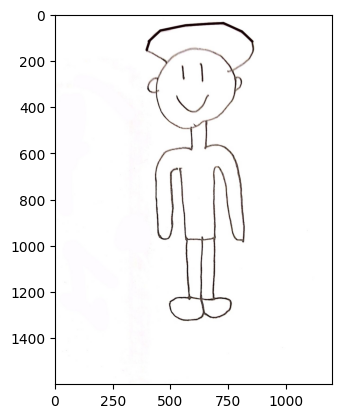

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from scipy.interpolate import splprep, splev
from skimage import measure
from scipy.spatial import ConvexHull

# Function to move points towards the center
def move_points_towards_center(points, center, step, threshold, edge_points):
    moved_points = []
    for point in points:
        while True:
            if np.any(np.all(np.isclose(edge_points, point, atol=threshold), axis=1)):
                break
            if abs(point[1] - center[1]) <= threshold:
                break
            if point[1] > center[1]:
                point[1] -= step
            else:
                point[1] += step
        moved_points.append(point)
    return np.array(moved_points)

# Function to fill gaps between points
def fill_gaps(points):
    filled_points = []
    for i in range(points.shape[1] - 1):
        start = points[:, i]
        end = points[:, i + 1]
        filled_points.append(start)
        while not np.array_equal(start, end):
            if start[0] < end[0]:
                start[0] += 1
            elif start[0] > end[0]:
                start[0] -= 1
            if start[1] < end[1]:
                start[1] += 1
            elif start[1] > end[1]:
                start[1] -= 1
            filled_points.append(start.copy())
    filled_points.append(points[:, -1])
    return np.array(filled_points).T

obj_front = cv2.imread("drawings/man-front.jpg")
plt.imshow(cv2.cvtColor(obj_front, cv2.COLOR_BGR2RGB))
plt.show()

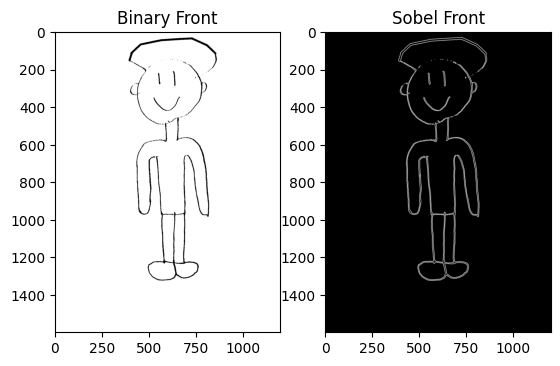

In [7]:
# Convert the image to grayscale
gray_obj_front = cv2.cvtColor(obj_front, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_obj_front = cv2.threshold(gray_obj_front, 127, 255, cv2.THRESH_BINARY)

# Apply Sobel operator to find edges
sobelx = cv2.Sobel(binary_obj_front, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(binary_obj_front, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges_front = np.sqrt(sobelx**2 + sobely**2)

plt.subplot(1, 2, 1)
plt.imshow(binary_obj_front, cmap="gray"); plt.title("Binary Front")
plt.subplot(1, 2, 2)
plt.imshow(sobel_edges_front, cmap="gray"); plt.title("Sobel Front")
plt.show()


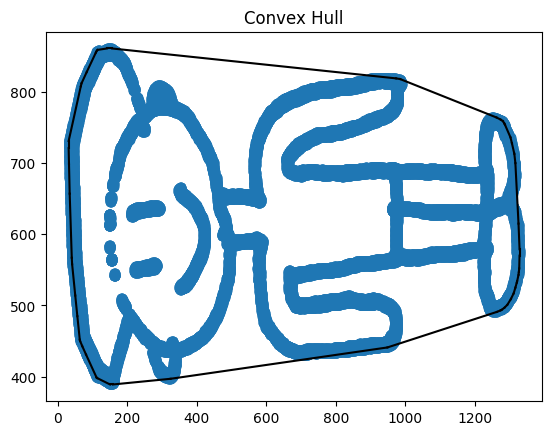

In [8]:
points_front = np.column_stack(np.where(sobel_edges_front > 0))
hull_front = ConvexHull(points_front)
plt.plot(points_front[:, 0], points_front[:, 1], "o")
plt.title('Points in the image')
for simplex in hull_front.simplices:
    plt.plot(points_front[simplex, 0], points_front[simplex, 1], 'k-')
plt.title('Convex Hull')

plt.show()